In [22]:
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


def read_tickers(file_path):
    """读取股票代码，假设每行一个股票代码，没有标题行"""
    with open(file_path, 'r') as file:
        tickers = file.read().splitlines()
    return tickers

# def read_eod_data(ticker, folder_path):
#     """读取EOD数据，并确保返回一维数组"""
#     file_path = os.path.join(folder_path, f'S&P500_{ticker}_1.csv')
#     df = pd.read_csv(file_path)
#     series = df.iloc[:, -1].values.flatten()  # 使用.flatten()确保结果是一维的
#     series_list = series.tolist()
#     return series_list
def read_eod_data(ticker, folder_path):
    """读取EOD数据，并确保返回形状为(2214, 1)的二维数组"""
    file_path = os.path.join(folder_path, f'S&P500_{ticker}_1.csv')
    df = pd.read_csv(file_path)
    series = df.iloc[:, -1].values
    series_reshaped = series.reshape(-1, 1)  # 将一维数组转换为二维数组
    return series_reshaped



def calculate_dtw_matrix(tickers, folder_path):
    """计算DTW相似度矩阵"""
    n = len(tickers)
    dtw_matrix = np.zeros((n, n))

    for i, ticker1 in enumerate(tickers):
        print('-------------------------------------------------------------------------------------')
        print('i:', i, ticker1)
        series1 = read_eod_data(ticker1, folder_path)
        for j, ticker2 in enumerate(tickers[i+1:], start=i+1):
            series2 = read_eod_data(ticker2, folder_path)
            # print('j:', j, ticker2)
            distance, _ = fastdtw(series1, series2, dist=euclidean)
            dtw_matrix[i, j] = dtw_matrix[j, i] = distance

    return dtw_matrix

# 文件路径
tickers_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/sp500_tickers_extracted.csv'
eod_data_folder_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/SP500_EOD'

# 读取股票代码并计算DTW相似度矩阵
tickers = read_tickers(tickers_file_path)

# 打印每个股票代码及其索引
for index, ticker in enumerate(tickers):
    print(f"Index: {index}, Ticker: {ticker}")

dtw_matrix = calculate_dtw_matrix(tickers, eod_data_folder_path)

# 保存邻接矩阵
output_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/dtw_matrix_with_tickers.csv'  # 更改为你想要保存的路径
pd.DataFrame(dtw_matrix, index=tickers, columns=tickers).to_csv(output_file_path)


Index: 0, Ticker: MMM
Index: 1, Ticker: AOS
Index: 2, Ticker: ABT
Index: 3, Ticker: ABBV
Index: 4, Ticker: ACN
Index: 5, Ticker: ADBE
Index: 6, Ticker: AMD
Index: 7, Ticker: AES
Index: 8, Ticker: AFL
Index: 9, Ticker: A
Index: 10, Ticker: APD
Index: 11, Ticker: AKAM
Index: 12, Ticker: ALK
Index: 13, Ticker: ALB
Index: 14, Ticker: ARE
Index: 15, Ticker: ALGN
Index: 16, Ticker: ALLE
Index: 17, Ticker: LNT
Index: 18, Ticker: ALL
Index: 19, Ticker: GOOGL
Index: 20, Ticker: GOOG
Index: 21, Ticker: MO
Index: 22, Ticker: AMZN
Index: 23, Ticker: AMCR
Index: 24, Ticker: AEE
Index: 25, Ticker: AAL
Index: 26, Ticker: AEP
Index: 27, Ticker: AXP
Index: 28, Ticker: AIG
Index: 29, Ticker: AMT
Index: 30, Ticker: AWK
Index: 31, Ticker: AMP
Index: 32, Ticker: AME
Index: 33, Ticker: AMGN
Index: 34, Ticker: APH
Index: 35, Ticker: ADI
Index: 36, Ticker: ANSS
Index: 37, Ticker: AON
Index: 38, Ticker: APA
Index: 39, Ticker: AAPL
Index: 40, Ticker: AMAT
Index: 41, Ticker: APTV
Index: 42, Ticker: ACGL
Index: 4

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 10).reshape(-1,1)
y = np.random.randn(10).reshape(-1,1)

print(x.shape)
print(y.shape)
print(x)

(10, 1)
(10, 1)
[[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]


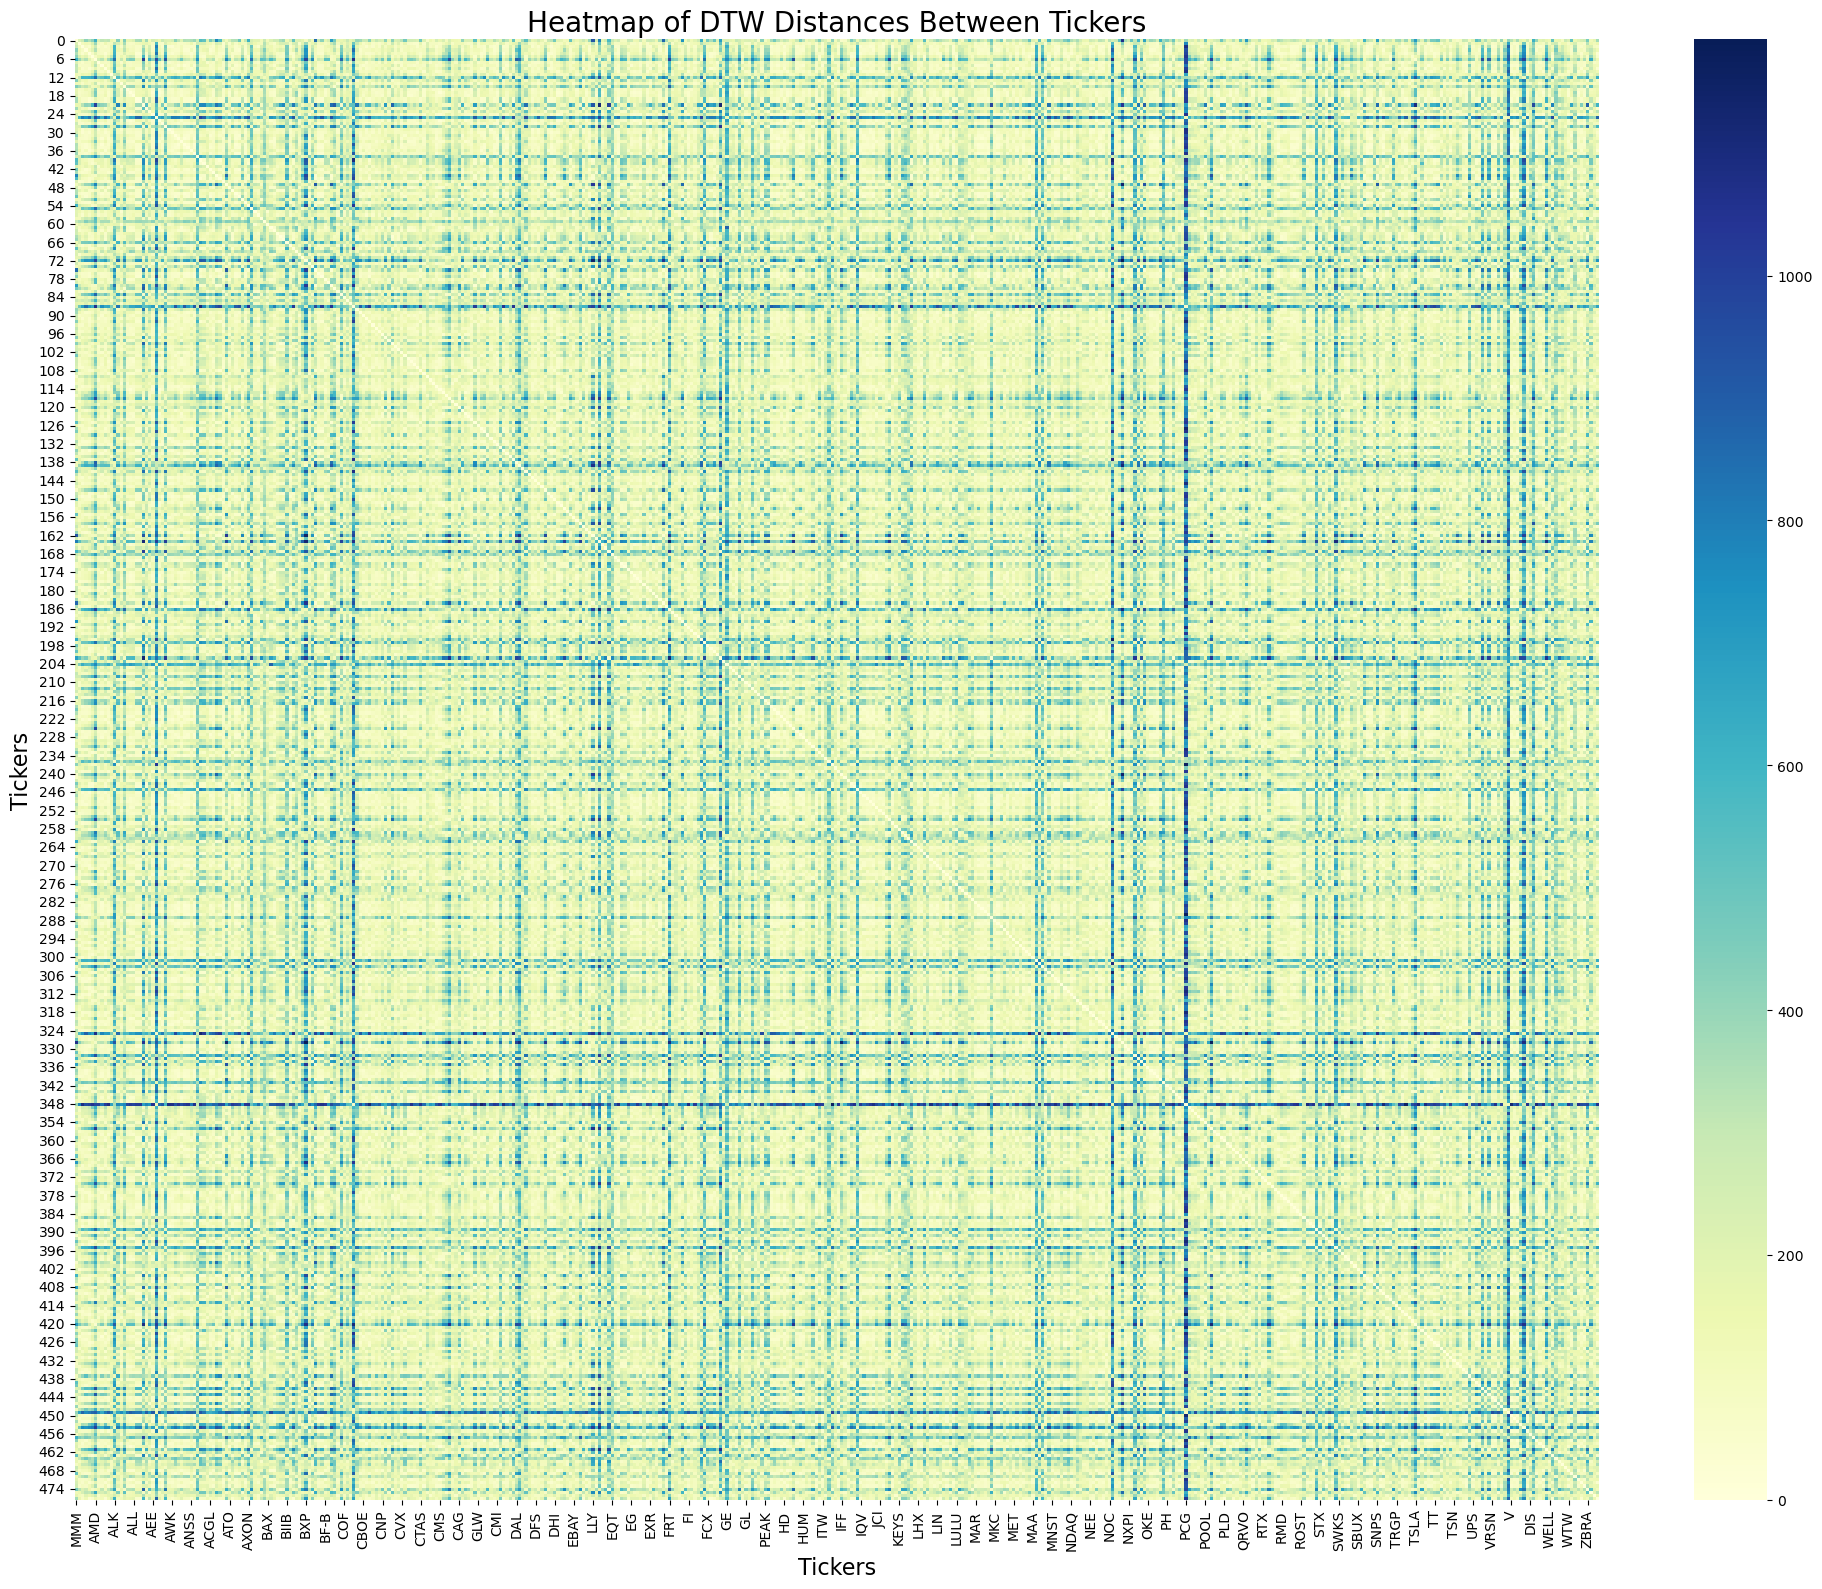

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载CSV文件
file_path = '../dtw_matrix_with_tickers.csv'
df = pd.read_csv(file_path)

# 为热力图准备数据，去除第一列（股票代码）
df_for_heatmap = df.drop(df.columns[0], axis=1)

# 设置图形的大小，提高分辨率
plt.figure(figsize=(20, 16))

# 绘制热力图
sns.heatmap(df_for_heatmap, cmap="YlGnBu")

# 添加标题和标签，并调整字体大小以提高可读性
plt.title('Heatmap of DTW Distances Between Tickers', fontsize=20)
plt.xlabel('Tickers', fontsize=16)
plt.ylabel('Tickers', fontsize=16)

# 调整布局
plt.tight_layout()

# 保存高分辨率的图像
high_res_heatmap_path = '../high_res_heatmap.png'
plt.savefig(high_res_heatmap_path, dpi=500)



In [27]:
import pandas as pd

# 加载CSV文件
file_path = '../dtw_matrix_with_tickers.csv'
df = pd.read_csv(file_path)

# 定义一个函数，用于查找每个股票代码对应的最小的10个DTW值及其股票代码
def find_smallest_dtw_values(df):
    results = {}
    # 遍历每一行（股票代码）
    for index, row in df.iterrows():
        # 获取股票代码
        ticker = row['Unnamed: 0']
        # 对该行进行排序以找到最小的10个值（排除第一个值，因为它是股票本身，值为零）
        sorted_row = row[1:].sort_values()[1:11]
        # 存储结果
        results[ticker] = sorted_row
    return results

# 查找每个股票代码的最小的10个DTW值
smallest_dtw_values = find_smallest_dtw_values(df)

# 将结果保存到CSV文件中
results_df = pd.DataFrame.from_dict({ticker: values.to_dict() for ticker, values in smallest_dtw_values.items()}, orient='index')
results_csv_path = '../smallest_dtw_values.csv'
results_df.to_csv(results_csv_path)

# 打印结果
for ticker, values in smallest_dtw_values.items():
    print(f"{ticker}: {values}")

MMM: IFF    64.596237
LUV    64.863703
C      66.637784
SEE    67.894522
USB     69.87555
D      72.635108
IP     75.767766
HAS    81.935923
MDT     83.92116
DIS    85.988526
Name: 0, dtype: object
AOS: SBUX     39.81708
AIZ     43.323821
CINF    48.797881
EXC     49.565194
MAS     51.227177
JPM     52.105312
TJX     53.185782
PKG     53.638653
BKNG    54.537186
CI      54.793023
Name: 1, dtype: object
ABT: NSC     33.994288
UNP     34.138253
DOV     36.300323
AWK     36.423187
HD      38.239125
HSY     39.617815
IQV     40.783626
AMT     43.168998
JKHY    43.325737
LOW     43.726089
Name: 2, dtype: object
ABBV: RJF     37.854304
J       38.598761
AZO     38.603749
ACGL    39.021662
PAYX    40.222967
TMUS     41.34018
ADI     41.874253
ORLY    43.655786
APH     43.835603
ORCL    44.880742
Name: 3, dtype: object
ACN: ZTS      30.353964
PLD      30.851678
GOOGL    31.120273
DHR      31.478742
GOOG      32.12633
SHW      32.990211
SPGI      33.01523
NDAQ     34.299897
A        34.989177
H

In [28]:
import pandas as pd

# 重新加载您之前上传的CSV文件
file_path = '../dtw_matrix_with_tickers.csv'
df = pd.read_csv(file_path)

# 定义一个函数，用于查找每个股票代码对应的最小的10个DTW值及其股票代码
def find_smallest_dtw_values(df):
    results = {}
    # 遍历每一行（股票代码）
    for index, row in df.iterrows():
        # 获取股票代码
        ticker = row['Unnamed: 0']
        # 对该行进行排序以找到最小的10个值（排除第一个值，因为它是股票本身，值为零）
        sorted_row = row[1:].sort_values()[1:11]
        # 存储结果
        results[ticker] = sorted_row
    return results

# 查找每个股票代码的最小的10个DTW值
smallest_dtw_values = find_smallest_dtw_values(df)

# 修改代码以保存结果，使每一行显示当前股票代码和与之DTW值最小的10个股票代码及DTW值
formatted_results = []
for ticker, values in smallest_dtw_values.items():
    # 将每个ticker的结果格式化为一个字符串
    formatted_result = f"{ticker}: " + ", ".join([f"{value_ticker} ({value})" for value_ticker, value in values.items()])
    formatted_results.append(formatted_result)

# 将格式化后的结果转换为DataFrame
formatted_results_df = pd.DataFrame(formatted_results, columns=['Ticker and Top 10 Smallest DTW Values'])

# 指定保存路径
formatted_results_csv_path = '../formatted_smallest_dtw_values.csv'

# 保存到CSV文件
formatted_results_df.to_csv(formatted_results_csv_path, index=False)

formatted_results_csv_path


'../formatted_smallest_dtw_values.csv'

In [29]:

file_path = '../dtw_matrix_with_tickers.csv'
df = pd.read_csv(file_path)

# 修改代码，保存DTW结果小于50的股票及其DTW值
def find_dtw_values_below_threshold(df, threshold=50):
    results = {}
    # 遍历每一行（股票代码）
    for index, row in df.iterrows():
        # 获取股票代码
        ticker = row['Unnamed: 0']
        # 筛选DTW值小于指定阈值的股票
        filtered_row = row[1:][row[1:] < threshold]
        # 存储结果
        results[ticker] = filtered_row
    return results

# 查找DTW值小于50的股票
dtw_values_below_threshold = find_dtw_values_below_threshold(df)

# 格式化结果并保存到CSV文件
formatted_results = []
for ticker, values in dtw_values_below_threshold.items():
    # 将每个ticker的结果格式化为一个字符串
    formatted_result = f"{ticker}: " + ", ".join([f"{value_ticker} ({value})" for value_ticker, value in values.items()])
    formatted_results.append(formatted_result)

# 将格式化后的结果转换为DataFrame
formatted_results_df = pd.DataFrame(formatted_results, columns=['Ticker and DTW Values Below 50'])

# 指定保存路径
formatted_results_csv_path = '../dtw_values_below_50.csv'

# 保存到CSV文件
formatted_results_df.to_csv(formatted_results_csv_path, index=False)


In [30]:
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


def read_tickers(file_path):
    """读取股票代码，假设每行一个股票代码，没有标题行"""
    with open(file_path, 'r') as file:
        tickers = file.read().splitlines()
    return tickers

# def read_eod_data(ticker, folder_path):
#     """读取EOD数据，并确保返回一维数组"""
#     file_path = os.path.join(folder_path, f'S&P500_{ticker}_1.csv')
#     df = pd.read_csv(file_path)
#     series = df.iloc[:, -1].values.flatten()  # 使用.flatten()确保结果是一维的
#     series_list = series.tolist()
#     return series_list
def read_eod_data(ticker, folder_path):
    """读取EOD数据，并确保返回形状为(2214, 1)的二维数组"""
    file_path = os.path.join(folder_path, f'S&P500_{ticker}_1.csv')
    df = pd.read_csv(file_path)
    series = df.iloc[:1772, -1].values
    series_reshaped = series.reshape(-1, 1)  # 将一维数组转换为二维数组
    return series_reshaped



def calculate_dtw_matrix(tickers, folder_path):
    """计算DTW相似度矩阵"""
    n = len(tickers)
    dtw_matrix = np.zeros((n, n))

    for i, ticker1 in enumerate(tickers):
        print('-------------------------------------------------------------------------------------')
        print('i:', i, ticker1)
        series1 = read_eod_data(ticker1, folder_path)
        for j, ticker2 in enumerate(tickers[i+1:], start=i+1):
            series2 = read_eod_data(ticker2, folder_path)
            # print('j:', j, ticker2)
            distance, _ = fastdtw(series1, series2, dist=euclidean)
            dtw_matrix[i, j] = dtw_matrix[j, i] = distance

    return dtw_matrix

# 文件路径
tickers_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/sp500_tickers_extracted.csv'
eod_data_folder_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/SP500_EOD'

# 读取股票代码并计算DTW相似度矩阵
tickers = read_tickers(tickers_file_path)

# 打印每个股票代码及其索引
for index, ticker in enumerate(tickers):
    print(f"Index: {index}, Ticker: {ticker}")

dtw_matrix = calculate_dtw_matrix(tickers, eod_data_folder_path)

# 保存邻接矩阵
output_file_path = '/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/dtw_matrix_with_tickers_1772.csv'  # 更改为你想要保存的路径
pd.DataFrame(dtw_matrix, index=tickers, columns=tickers).to_csv(output_file_path)

Index: 0, Ticker: MMM
Index: 1, Ticker: AOS
Index: 2, Ticker: ABT
Index: 3, Ticker: ABBV
Index: 4, Ticker: ACN
Index: 5, Ticker: ADBE
Index: 6, Ticker: AMD
Index: 7, Ticker: AES
Index: 8, Ticker: AFL
Index: 9, Ticker: A
Index: 10, Ticker: APD
Index: 11, Ticker: AKAM
Index: 12, Ticker: ALK
Index: 13, Ticker: ALB
Index: 14, Ticker: ARE
Index: 15, Ticker: ALGN
Index: 16, Ticker: ALLE
Index: 17, Ticker: LNT
Index: 18, Ticker: ALL
Index: 19, Ticker: GOOGL
Index: 20, Ticker: GOOG
Index: 21, Ticker: MO
Index: 22, Ticker: AMZN
Index: 23, Ticker: AMCR
Index: 24, Ticker: AEE
Index: 25, Ticker: AAL
Index: 26, Ticker: AEP
Index: 27, Ticker: AXP
Index: 28, Ticker: AIG
Index: 29, Ticker: AMT
Index: 30, Ticker: AWK
Index: 31, Ticker: AMP
Index: 32, Ticker: AME
Index: 33, Ticker: AMGN
Index: 34, Ticker: APH
Index: 35, Ticker: ADI
Index: 36, Ticker: ANSS
Index: 37, Ticker: AON
Index: 38, Ticker: APA
Index: 39, Ticker: AAPL
Index: 40, Ticker: AMAT
Index: 41, Ticker: APTV
Index: 42, Ticker: ACGL
Index: 4

In [31]:
# 重新加载您之前上传的CSV文件
file_path = '../dtw_matrix_with_tickers_1772.csv'
df = pd.read_csv(file_path)

# 定义一个函数，用于查找每个股票代码对应的最小的10个DTW值及其股票代码
def find_smallest_dtw_values(df):
    results = {}
    # 遍历每一行（股票代码）
    for index, row in df.iterrows():
        # 获取股票代码
        ticker = row['Unnamed: 0']
        # 对该行进行排序以找到最小的10个值（排除第一个值，因为它是股票本身，值为零）
        sorted_row = row[1:].sort_values()[1:11]
        # 存储结果
        results[ticker] = sorted_row
    return results

# 查找每个股票代码的最小的10个DTW值
smallest_dtw_values = find_smallest_dtw_values(df)

# 修改代码以保存结果，使每一行显示当前股票代码和与之DTW值最小的10个股票代码及DTW值
formatted_results = []
for ticker, values in smallest_dtw_values.items():
    # 将每个ticker的结果格式化为一个字符串
    formatted_result = f"{ticker}: " + ", ".join([f"{value_ticker} ({value})" for value_ticker, value in values.items()])
    formatted_results.append(formatted_result)

# 将格式化后的结果转换为DataFrame
formatted_results_df = pd.DataFrame(formatted_results, columns=['Ticker and Top 10 Smallest DTW Values'])

# 指定保存路径
formatted_results_csv_path = '../formatted_smallest_dtw_values_1772.csv'

# 保存到CSV文件
formatted_results_df.to_csv(formatted_results_csv_path, index=False)

formatted_results_csv_path

'../formatted_smallest_dtw_values_1772.csv'

In [40]:
file_path = '../dtw_matrix_with_tickers_1772.csv'
df = pd.read_csv(file_path)

# 修改代码，保存DTW结果小于50的股票及其DTW值
def find_dtw_values_below_threshold(df, threshold=50):
    results = {}
    # 遍历每一行（股票代码）
    for index, row in df.iterrows():
        # 获取股票代码
        ticker = row['Unnamed: 0']
        # 对该行进行排序以找到最小的10个值（包括第一个值，因为它是股票本身，值为零）
        sorted_row = row[1:].sort_values()[:11]
        # 筛选DTW值小于指定阈值的股票
        filtered_row = sorted_row[row[1:] < threshold]
        # 存储结果
        results[ticker] = filtered_row
    return results

# 查找DTW值小于50的股票
dtw_values_below_threshold = find_dtw_values_below_threshold(df)

# 格式化结果并保存到CSV文件
formatted_results = []
for ticker, values in dtw_values_below_threshold.items():
    # 将每个ticker的结果格式化为一个字符串
    formatted_result = f"{ticker}: " + ", ".join([f"{value_ticker} ({value})" for value_ticker, value in values.items()])
    formatted_results.append(formatted_result)

# 将格式化后的结果转换为DataFrame
formatted_results_df = pd.DataFrame(formatted_results, columns=['Ticker and DTW Values Below 50'])

# 指定保存路径
formatted_results_csv_path = '../dtw_values_below_50_&_min10_1772.csv'

# 保存到CSV文件
formatted_results_df.to_csv(formatted_results_csv_path, index=False)


In [41]:
file_path = '../dtw_matrix_with_tickers_1772.csv'
df = pd.read_csv(file_path)

def find_dtw_values_below_threshold(df, threshold=50):
    results = {}
    for index, row in df.iterrows():
        ticker = row['Unnamed: 0']
        sorted_row = row[1:].sort_values()[:11]
        filtered_row = sorted_row[row[1:] < threshold]
        results[ticker] = filtered_row
    return results

dtw_values_below_threshold = find_dtw_values_below_threshold(df)

formatted_results = []
for ticker, values in dtw_values_below_threshold.items():
    # 只包含股票代码，不包含DTW值
    formatted_result = f"{ticker}: " + ", ".join([f"{value_ticker}" for value_ticker in values.keys()])
    formatted_results.append(formatted_result)

formatted_results_df = pd.DataFrame(formatted_results, columns=['Ticker and DTW Values Below 50'])

formatted_results_csv_path = '../dtw_values_below_50_&_min10_1772——ticker.csv'

formatted_results_df.to_csv(formatted_results_csv_path, index=False)

## 生成基于DTW的邻接矩阵并保存

In [11]:
import pandas as pd
import numpy as np

def build_adjacency_matrix(df_tickers, df_dtw_values):
    # 创建一个字典，用于将股票代码映射到索引
    ticker_to_index = {ticker: index for index, ticker in enumerate(df_tickers.iloc[:, 0])}

    # 初始化邻接矩阵
    n = len(df_tickers)
    print(n)
    adjacency_matrix = np.zeros((n, n, 1))

    # 遍历DTW值文件
    for row in df_dtw_values.iloc[:, 0]:
        # 分割行以获取基础股票代码及其关联的股票代码
        parts = row.split(': ')
        base_ticker = parts[0]
        related_tickers = parts[1].split(', ')

        # 检查基础股票代码是否在股票列表中
        if base_ticker in ticker_to_index:
            base_index = ticker_to_index[base_ticker]
            for ticker in related_tickers:
                # 检查关联的股票代码是否在股票列表中并更新矩阵
                if ticker in ticker_to_index:
                    ticker_index = ticker_to_index[ticker]
                    adjacency_matrix[base_index, ticker_index, 0] = 1  # 使用1表示关系
    
    return adjacency_matrix

# 加载数据
df_tickers = pd.read_csv('/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/sp500_tickers_extracted.csv', header=None)
df_dtw_values = pd.read_csv('/Users/liupeng/Desktop/DSAA 5020 Final Project/TGCN_with_latest_data/2023.12.14(Data acquisition& Preprocessing)/dtw_values_below_50_&_min10_1772——ticker.csv')

# 构建邻接矩阵
adjacency_matrix = build_adjacency_matrix(df_tickers, df_dtw_values)
print(adjacency_matrix.shape)

# 保存邻接矩阵
np.save('../adjacency_matrix_DTW.npy', adjacency_matrix)



478
(478, 478, 1)


In [14]:
df_tickers.head()

,0
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN


In [24]:
adjacency_matrix[477, :, 0].sum()

11.0